In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output
# I don't get this, "subprocess" and "check_output

In [48]:
data = pd.read_csv("hr.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [50]:
# This is interesting. This posing tries to convert strs to numerics for higher efficienciy of processing the dat

data['sales'].unique(), data['salary'].unique()


(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


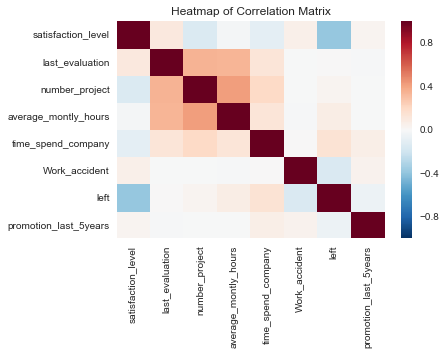

In [51]:
# I think "heatmap" is quite popular to disply the corr between b
# various varible consisting the data.
# popular. it is.


corr = data.corr()
corr = (corr)  # I don't get this point. Why put ()?
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels = corr.columns.values)

sns.plt.title("Heatmap of Correlation Matrix")
corr

In [52]:
corr_left=pd.DataFrame(corr['left'].drop('left'))
corr_left.sort_values(by='left', ascending=False)
                    

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
promotion_last_5years,-0.061788
Work_accident,-0.154622
satisfaction_level,-0.388375


In [53]:
# Exploratory Data Analysis (EDA) - Dont know this concept.

data['avg_hour_project']=(data['average_montly_hours']*12)/data['number_project']
data['avg_hour_project_range']=pd.cut(data['avg_hour_project'],3)
data[['avg_hour_project_range', 'left']].groupby(['avg_hour_project_range']).mean()

,left
avg_hour_project_range,
"(192.334, 749.333]",0.186359
"(749.333, 1304.667]",0.340725
"(1304.667, 1860]",0.098940


In [54]:
data.loc[data['avg_hour_project']<=749.333, 'avg_hour_project']=0
data.loc[(data['avg_hour_project']>749.333) &(data['avg_hour_project']<=1304.667), 'avg_hour_project']=1
data.loc[(data['avg_hour_project']>1304.667) & (data['avg_hour_project']<=1860.00), 'avg_hour_project']=2
data.drop(['avg_hour_project_range'], axis=1, inplace =True)

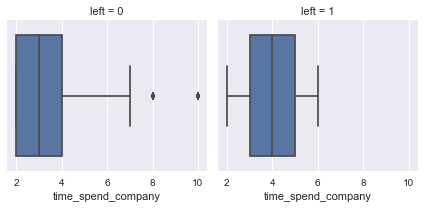

In [55]:
g = sns.FacetGrid(data,col='left')
g.map(sns.boxplot,'time_spend_company')

In [56]:
dropdata = data[data['time_spend_company']>=8]
data.drop(dropdata.index, inplace = True)


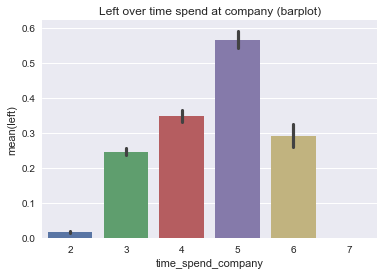

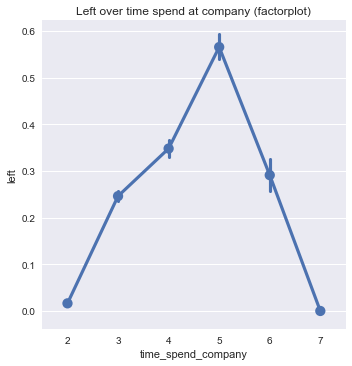

In [57]:
sns.barplot(x='time_spend_company', y='left', data=data)
sns.plt.title('Left over time spend at company (barplot)')
sns.factorplot(x='time_spend_company', y='left', data=data, size=5)
sns.plt.title('Left over time spend at company (factorplot)')

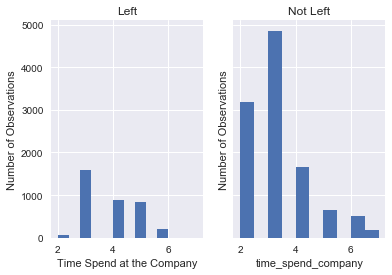

In [58]:
left=data[data['left']==1]
not_left=data[data['left']==0]
f, axrrr=plt.subplots(1,2,sharey=True, sharex=True)

axrrr[0].hist('time_spend_company', data=left, bins=10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('Time Spend at the Company')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('time_spend_company', data=not_left, bins=10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('time_spend_company')
axrrr[1].set_ylabel('Number of Observations')

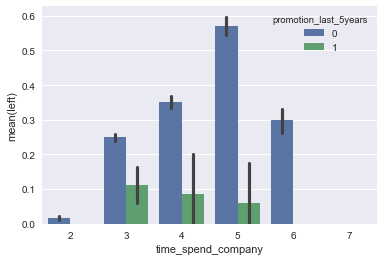

In [59]:
# time spend with promotion
sns.barplot(x='time_spend_company', y='left', hue='promotion_last_5years', data=data)

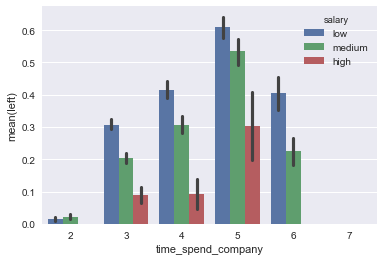

In [60]:
sns.barplot(x='time_spend_company', y='left', hue='salary', data=data)

C:\Users\Administrator\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


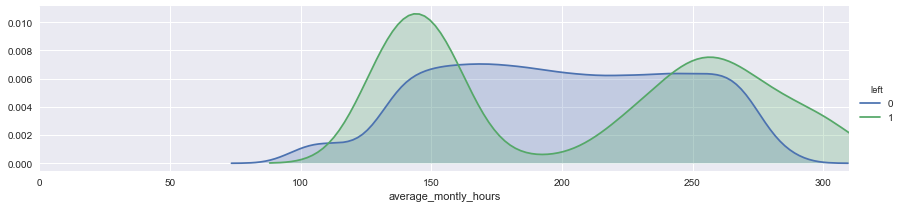

In [61]:
g = sns.FacetGrid(data, hue="left", aspect=4)
g.map(sns.kdeplot, 'average_montly_hours', shade=True)
g.set(xlim=(0,data['average_montly_hours']. max()))
g.add_legend()

(207.41921030523662, 199.13409337676438)

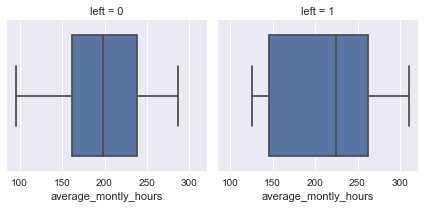

In [62]:
#Boxplot
g=sns.FacetGrid(data, col='left')
g.map(sns.boxplot, 'average_montly_hours')
np.mean(data[data['left']==1]['average_montly_hours']), np.mean(data[data['left']==0]['average_montly_hours'])

In [63]:
data['avg_mon_hours_range']=pd.cut(data['average_montly_hours'],3)
data[['avg_mon_hours_range', 'left']].groupby(['avg_mon_hours_range']).mean()

,left
avg_mon_hours_range,
"(95.786, 167.333]",0.334932
"(167.333, 238.667]",0.072888
"(238.667, 310]",0.363340


In [64]:
#Replace continuous values by categorical ones
data.loc[data['average_montly_hours']<=167.333,
    'average_montly_hours']=0
data.loc[(data['average_montly_hours']>167.333)&(data['average_montly_hours']<=238.667), 'average_montly_hours']=1
data.loc[(data['average_montly_hours']>238.667)&(data['average_montly_hours']<=310.000),'average_montly_hours']=2
data.drop(['avg_mon_hours_range'], axis=1, inplace=True)

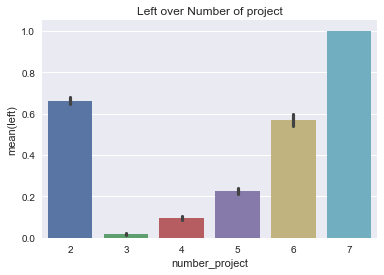

In [65]:
#number_project
sns.barplot(x='number_project', y='left', data=data)
sns.plt.title('Left over Number of project')

left_median: 4.0
not_left_median"  4.0


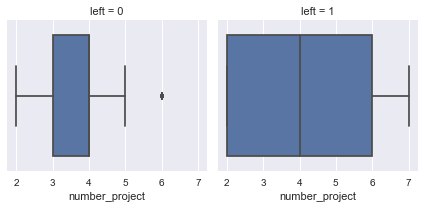

In [66]:
g=sns.FacetGrid(data, col='left')
g.map(sns.boxplot,'number_project')
print('left_median:',np.median(data[data['left']==1]['number_project']))
print('not_left_median" ', np.median(data[data['left']==0]['number_project']))


In [67]:
dropdata=data[(data['number_project']==8)&(data['left']==0)]
data.drop(dropdata.index, inplace=True)

C:\Users\Administrator\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


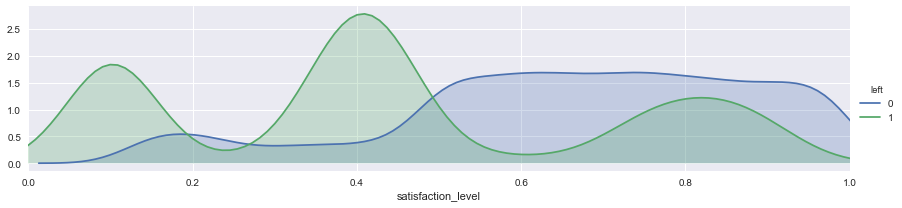

In [68]:
g=sns.FacetGrid(data, hue="left", aspect=4)
g.map(sns.kdeplot,'satisfaction_level',shade=True)
g.set(xlim=(0,data['satisfaction_level'].max()))
g.add_legend()

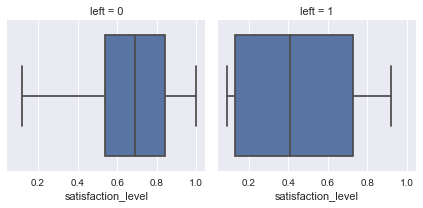

In [69]:
g=sns.FacetGrid(data,col='left')
g.map(sns.boxplot, 'satisfaction_level')

In [70]:
data['satisfaction_range']=pd.cut(data['satisfaction_level'],3)
data[['satisfaction_range','left']].groupby(['satisfaction_range']).mean()

,left
satisfaction_range,
"(0.0891, 0.393]",0.545455
"(0.393, 0.697]",0.196339
"(0.697, 1]",0.148668


C:\Users\Administrator\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


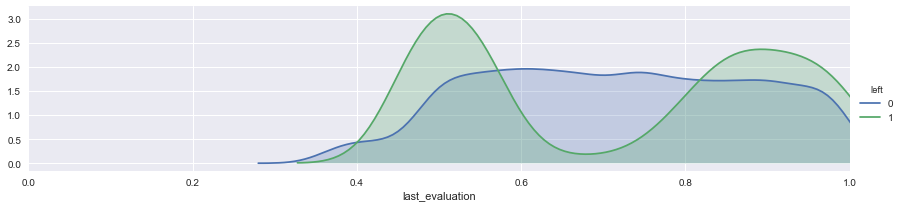

In [71]:
g=sns.FacetGrid(data,hue="left", aspect=4)
g.map(sns.kdeplot,'last_evaluation', shade=True)
g.set(xlim=(0, data['last_evaluation'].max()))
g.add_legend()

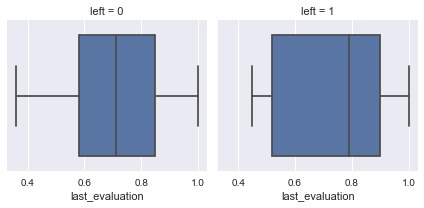

In [72]:
g=sns.FacetGrid(data, col='left')
g.map(sns.boxplot,'last_evaluation')

In [73]:
data.loc[(data['satisfaction_level'] > 0.697) & (data['satisfaction_level'] <= 1.000), 'satisfaction_level'] = 2
data.loc[(data['satisfaction_level'] > 0.393) & (data['satisfaction_level'] <= 0.697), 'satisfaction_level'] = 1
data.loc[data['satisfaction_level'] <= 0.393, 'satisfaction_level'] = 0

data.drop(['satisfaction_range'], axis = 1, inplace = True)

In [74]:
data['evaluation_range']=pd.cut(data['last_evaluation'],3)
data[['evaluation_range', 'left']].groupby(['evaluation_range']).mean()

,left
evaluation_range,
"(0.359, 0.573]",0.380430
"(0.573, 0.787]",0.041594
"(0.787, 1]",0.305770


In [75]:
data.loc[(data['last_evaluation']>0.787)&(data['last_evaluation']<=1), 'last_evaluation']=2
data.loc[(data['last_evaluation']>0.573)&(data['last_evaluation']<=0.787), 'last_evaluation']=1
data.loc[data['last_evaluation']<=0.573,'last_evaluation']=0
data.drop(['evaluation_range'],axis=1,inplace=True)

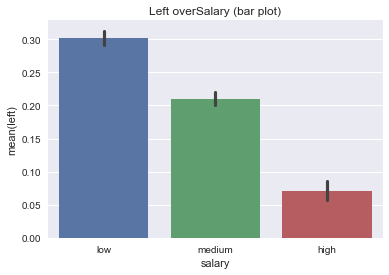

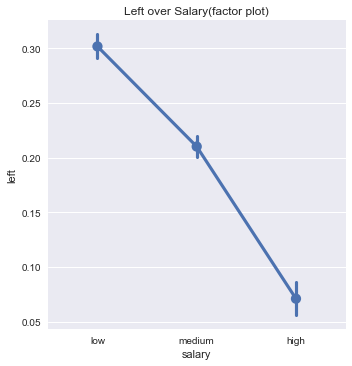

In [76]:
sns.barplot('salary','left',data=data)
sns.plt.title('Left overSalary (bar plot)')
sns.factorplot('salary','left', data=data, size=5)
sns.plt.title('Left over Salary(factor plot)')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

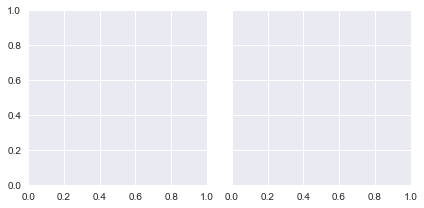

In [77]:
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot,'salary')